## Overview
- **Data Preprocessing:** Load and preprocess text data from an Excel file.
- **Word2Vec:** Train a model to generate word embeddings.
- **Document Embeddings:** Compute average embeddings for each document.
- **Feature Expansion:** Expand document embeddings into separate columns.
- **Classification:** Build two supervised models to predict `Primary_Category`.


## I. Data Loading & Preprocessing

**Steps:**
- Load the Excel file into a DataFrame.
- Convert the `Token_Description` column (stored as string) into lists.
- Display DataFrame info and preview the first few rows.

In [1]:
#!pip install gensim

In [2]:
import pandas as pd
import ast

# Load data from Excel
df = pd.read_excel("/content/books_token.xlsx")

# Convert the 'Token_Description' column from string to a list
df["Token_Description"] = df['Token_Description'].apply(ast.literal_eval)

# Display DataFrame structure and a preview
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65295 entries, 0 to 65294
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    65295 non-null  object 
 1   Authors                  65295 non-null  object 
 2   Description              65289 non-null  object 
 3   Category                 65295 non-null  object 
 4   Publisher                65295 non-null  object 
 5   Price Starting With ($)  65295 non-null  float64
 6   Publish Date (Month)     65295 non-null  object 
 7   Publish Date (Year)      65295 non-null  int64  
 8   Token_Description        65295 non-null  object 
 9   Primary_Category         65295 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 5.0+ MB
None


,Title,Authors,Description,Category,Publisher,Price Starting With ($),Publish Date (Month),Publish Date (Year),Token_Description,Primary_Category
0,Journey Through Heartsongs,"By Stepanek, Mattie J. T.",Collects poems written by the eleven-year-old ...,"Poetry , General",VSP Books,19.96,September,2001,"[collects, poems, written, by, the, eleven, ye...",Poetry
1,In Search of Melancholy Baby,"By Aksyonov, Vassily, Heim, Michael Henry, and...",The Russian author offers an affectionate chro...,"Biography & Autobiography , General",Random House,4.99,June,1987,"[the, russian, author, offers, an, affectionat...",Biography & Autobiography
2,The Dieter's Guide to Weight Loss During Sex,"By Smith, Richard","A humor classic, this tongue-in-cheek diet pla...","Health & Fitness , Diet & Nutrition , Diets",Workman Publishing Company,4.99,January,1978,"[a, humor, classic, this, tongue, in, cheek, d...",Health & Fitness
3,Germs : Biological Weapons and America's Secre...,"By Miller, Judith, Engelberg, Stephen, and Bro...","Deadly germs sprayed in shopping malls, bomb-l...","Technology & Engineering , Military Science",Simon & Schuster,4.99,October,2001,"[deadly, germs, sprayed, in, shopping, malls, ...",Technology & Engineering
4,The Good Book: Reading the Bible with Mind and...,"By Gomes, Peter J.","""The Bible and the social and moral consequenc...","Religion , Biblical Biography , General",Harper Perennial,5.29,May,1998,"[the, bible, and, the, social, and, moral, con...",Religion


## II. Train the Word2Vec Model

**Steps:**
- Extract tokenized sentences from the DataFrame.
- Train the Word2Vec model with the following parameters:
  - `vector_size = 100`
  - `window = 5`
  - `sg = 0` (CBOW model)
  - `min_count = 3` (ignore infrequent words)

In [3]:
from gensim.models import Word2Vec

# Extract sentences (each sentence is a list of tokens)
sentences = df["Token_Description"].to_list()

# Train the Word2Vec model
w2v = Word2Vec(sentences,
               vector_size = 100,
               window = 5,
               sg = 0,
               min_count = 3)

In [4]:
# Save model
w2v.save("word2vecweek8.model")

# Load the saved Word2Vec model
#w2v = gensim.models.Word2Vec.load("/content/word2vecweek8.model")

## III. Compute Document-Level Embeddings

**Steps:**
- Define a function (`average_embedding`) to compute the average embedding:
  - Extract embeddings for tokens that exist in the model's vocabulary.
  - Return the mean vector or a zero vector if no tokens are found.
- Apply this function to each row to create the `Document_Embedding` column.

In [5]:
import numpy as np

def average_embedding(tokens, model):
    # Get embeddings for tokens present in the model
    embeddings = [model.wv[word] for word in tokens if word in model.wv]

    # Return the average if available, else a zero vector
    if embeddings:
        return np.mean(embeddings, axis=0) # Mean of each vector
    else:
        return np.zeros(model.vector_size)

# Apply the function to compute document embeddings
df["Document_Embedding"] = df["Token_Description"].apply(lambda tokens: average_embedding(tokens, w2v))
df.head()

,Title,Authors,Description,Category,Publisher,Price Starting With ($),Publish Date (Month),Publish Date (Year),Token_Description,Primary_Category,Document_Embedding
0,Journey Through Heartsongs,"By Stepanek, Mattie J. T.",Collects poems written by the eleven-year-old ...,"Poetry , General",VSP Books,19.96,September,2001,"[collects, poems, written, by, the, eleven, ye...",Poetry,"[0.36494666, 0.32432726, 0.40508035, 0.1197261..."
1,In Search of Melancholy Baby,"By Aksyonov, Vassily, Heim, Michael Henry, and...",The Russian author offers an affectionate chro...,"Biography & Autobiography , General",Random House,4.99,June,1987,"[the, russian, author, offers, an, affectionat...",Biography & Autobiography,"[0.27735895, -0.24206851, 0.42217913, -0.08393..."
2,The Dieter's Guide to Weight Loss During Sex,"By Smith, Richard","A humor classic, this tongue-in-cheek diet pla...","Health & Fitness , Diet & Nutrition , Diets",Workman Publishing Company,4.99,January,1978,"[a, humor, classic, this, tongue, in, cheek, d...",Health & Fitness,"[0.52877676, 0.08745807, 0.2575177, -0.1827280..."
3,Germs : Biological Weapons and America's Secre...,"By Miller, Judith, Engelberg, Stephen, and Bro...","Deadly germs sprayed in shopping malls, bomb-l...","Technology & Engineering , Military Science",Simon & Schuster,4.99,October,2001,"[deadly, germs, sprayed, in, shopping, malls, ...",Technology & Engineering,"[-0.18934925, -0.16623873, 0.76136774, 0.09445..."
4,The Good Book: Reading the Bible with Mind and...,"By Gomes, Peter J.","""The Bible and the social and moral consequenc...","Religion , Biblical Biography , General",Harper Perennial,5.29,May,1998,"[the, bible, and, the, social, and, moral, con...",Religion,"[0.19368258, -0.28063187, 0.53839785, -0.20618..."


## IV. Expand Embeddings into Separate Columns

**Steps:**
- Convert the `Document_Embedding` column (which contains vectors) into a DataFrame.
- Rename the new columns to `embedding_0`, `embedding_1`, etc.
- Concatenate this new DataFrame with the original DataFrame.

In [6]:
# Convert embeddings column to a DataFrame
embedding_df = pd.DataFrame(df["Document_Embedding"].tolist(), index=df.index)

# Rename the columns for clarity
embedding_df.columns = [f"embedding_{i}" for i in range(embedding_df.shape[1])]

# Concatenate the new embedding DataFrame with the original DataFrame
df = pd.concat([df, embedding_df], axis=1)
df.head()

,Title,Authors,Description,Category,Publisher,Price Starting With ($),Publish Date (Month),Publish Date (Year),Token_Description,Primary_Category,...,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99
0,Journey Through Heartsongs,"By Stepanek, Mattie J. T.",Collects poems written by the eleven-year-old ...,"Poetry , General",VSP Books,19.96,September,2001,"[collects, poems, written, by, the, eleven, ye...",Poetry,...,0.050753,-0.004782,-0.224457,0.333173,0.061429,-0.344181,-0.104603,1.241248,0.053592,-0.036416
1,In Search of Melancholy Baby,"By Aksyonov, Vassily, Heim, Michael Henry, and...",The Russian author offers an affectionate chro...,"Biography & Autobiography , General",Random House,4.99,June,1987,"[the, russian, author, offers, an, affectionat...",Biography & Autobiography,...,-0.853625,0.562550,0.248815,0.023212,0.609066,-0.360671,-0.269399,0.161697,0.316011,0.855435
2,The Dieter's Guide to Weight Loss During Sex,"By Smith, Richard","A humor classic, this tongue-in-cheek diet pla...","Health & Fitness , Diet & Nutrition , Diets",Workman Publishing Company,4.99,January,1978,"[a, humor, classic, this, tongue, in, cheek, d...",Health & Fitness,...,-0.675341,0.236859,-0.296168,0.062274,0.199674,-0.157928,-0.302646,-0.246151,0.226746,0.383235
3,Germs : Biological Weapons and America's Secre...,"By Miller, Judith, Engelberg, Stephen, and Bro...","Deadly germs sprayed in shopping malls, bomb-l...","Technology & Engineering , Military Science",Simon & Schuster,4.99,October,2001,"[deadly, germs, sprayed, in, shopping, malls, ...",Technology & Engineering,...,-0.222297,0.431906,0.064572,0.129003,0.667149,-0.245792,-0.205849,0.230239,0.053173,0.532870
4,The Good Book: Reading the Bible with Mind and...,"By Gomes, Peter J.","""The Bible and the social and moral consequenc...","Religion , Biblical Biography , General",Harper Perennial,5.29,May,1998,"[the, bible, and, the, social, and, moral, con...",Religion,...,-0.315139,0.047502,0.040552,0.312473,0.211755,-0.160326,-0.081905,0.686711,-0.169944,0.412131


## V. Classification Example: Decision Tree (Selected Categories)

**Steps:**
- **Subset Data:** Keep rows with `Primary_Category` as *Cooking* or *Religion*.
- **Prepare Features:** Use columns that start with `embedding_`.
- **Split Data:** Use an 80/20 train-test split.
- **Train Model:** Fit a Decision Tree Classifier.
- **Evaluate:** Print accuracy and a classification report.

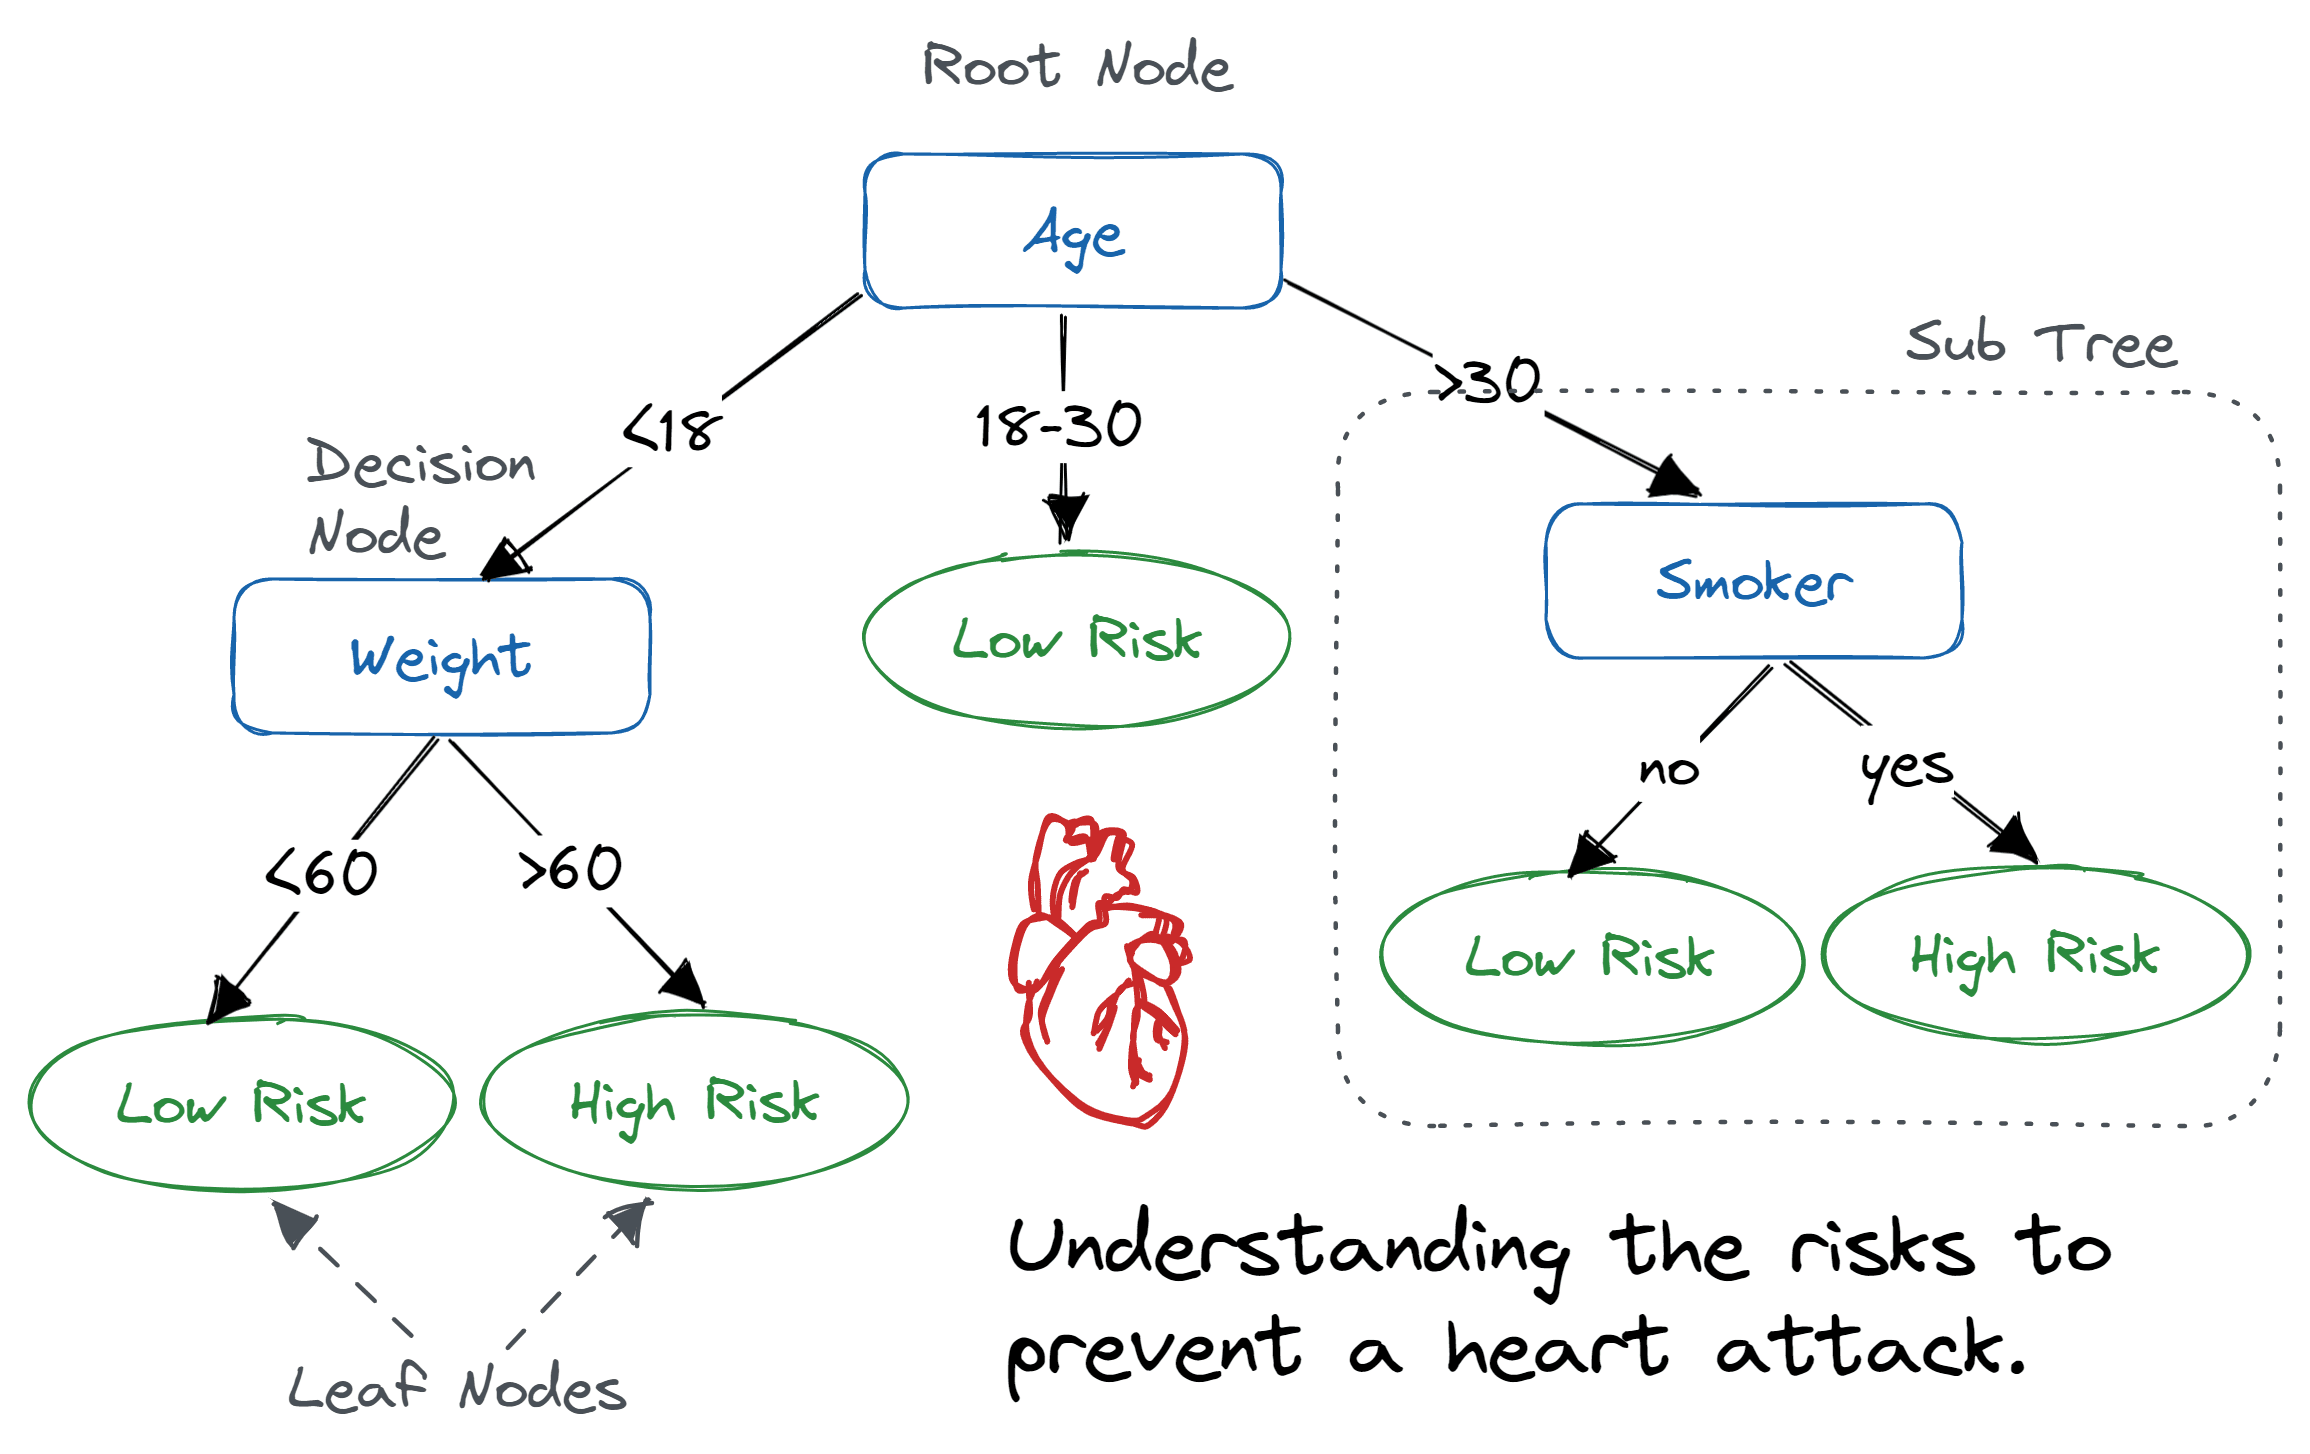

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Subset data for selected categories
select_categories = ["Cooking", "Religion"]
sub_df = df[df["Primary_Category"].isin(select_categories)]

# Prepare features and target
feature_columns = [col for col in sub_df.columns if col.startswith("embedding_")]
X = sub_df[feature_columns]
y = sub_df["Primary_Category"]

# Split data (20% train, 80% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9574886833300531
              precision    recall  f1-score   support

     Cooking       0.96      0.95      0.95      2326
    Religion       0.96      0.96      0.96      2755

    accuracy                           0.96      5081
   macro avg       0.96      0.96      0.96      5081
weighted avg       0.96      0.96      0.96      5081



## VI. Classification Example: Random Forest (Sampled Categories)

**Steps:**
- **Identify Categories:** Count samples for each `Primary_Category`.
- **Filter Categories:** Select those with counts >2000 and <10000.
- **Sample Data:** Randomly sample 2000 rows for each selected category.
- **Prepare Features:** Use the embedding columns as features.
- **Split Data:** Use an 80/20 train-test split.
- **Train Model:** Fit a Random Forest Classifier.
- **Evaluate:** Print accuracy and a classification report.

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Identify categories with >2000 and <10000 samples
category_counts = df['Primary_Category'].value_counts()
categories_to_sample = category_counts[(category_counts > 2000) & (category_counts < 10000)].index

# Sample 2000 rows for each selected category
sub_df = pd.concat([
    df[df['Primary_Category'] == cat].sample(2000, random_state=42)
    for cat in categories_to_sample
])

# Prepare features and target
feature_columns = [col for col in sub_df.columns if col.startswith("embedding_")]
X = sub_df[feature_columns]
y = sub_df["Primary_Category"]

# Split the data (20% train, 80% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7590178571428572
                           precision    recall  f1-score   support

Biography & Autobiography       0.68      0.71      0.70      1575
     Business & Economics       0.86      0.86      0.86      1614
                  Cooking       0.95      0.93      0.94      1607
                  History       0.66      0.75      0.70      1599
         Juvenile Fiction       0.77      0.79      0.78      1606
      Juvenile Nonfiction       0.62      0.60      0.61      1580
                 Religion       0.79      0.68      0.73      1619

                 accuracy                           0.76     11200
                macro avg       0.76      0.76      0.76     11200
             weighted avg       0.76      0.76      0.76     11200



In [9]:
X_train

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99
64016,0.028301,0.236430,0.152778,0.368196,0.007054,-0.490558,-0.168210,0.969824,-0.343548,-0.103366,...,-1.056941,0.193846,-0.170738,-0.145034,0.026640,0.056190,0.210565,0.189932,0.199941,0.604286
2175,0.204307,-0.412934,0.276761,-0.090090,0.119275,-0.183623,-0.438151,0.281424,-0.035997,-0.363842,...,-0.772839,0.601540,-0.424828,-0.237691,0.537194,-0.376787,-0.073151,0.312048,0.241016,0.465624
37311,0.273500,0.154214,0.878449,0.321551,0.327405,0.403591,-0.349521,0.952574,0.132839,0.550615,...,0.165955,-0.006162,-0.224989,0.315891,-0.020783,0.183592,-0.507384,0.600460,0.000024,-0.042077
5324,-0.084957,-0.278963,0.865624,-0.191615,0.345234,-0.255269,-0.913767,-0.062794,-0.329755,-0.255013,...,-0.272372,0.516119,-0.030369,0.068377,0.541645,-0.051891,-0.395067,0.337320,-0.018475,0.550950
339,0.267712,-0.281807,0.589226,-0.010975,0.252122,-0.097665,-0.388883,0.295326,-0.416265,-0.138479,...,-0.615137,0.201423,-0.374926,-0.044653,0.297549,-0.440196,-0.259289,0.245899,0.368655,0.330704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33272,0.286679,0.663440,-0.372621,0.725660,0.238724,-1.398703,-0.240793,1.227855,-0.778726,-0.982660,...,-1.376204,-0.187065,0.189621,-0.196605,0.392938,-0.498011,0.552862,-0.720827,0.246518,0.444428
24416,0.081517,-0.291621,0.756818,-0.002618,0.221745,0.081882,-0.495597,0.069903,-0.525227,-0.125596,...,-0.275910,0.394099,-0.224502,0.208629,0.417446,-0.275349,-0.324308,0.542614,-0.034842,0.384986
54610,0.073068,0.125355,0.329225,0.348096,0.429392,-0.297066,-0.449750,0.757450,-0.115596,-0.025990,...,-0.572114,0.049334,-0.400435,0.255778,0.303493,0.132883,0.025939,0.163274,0.270851,0.142286
21711,0.090634,0.304814,0.774133,0.365489,0.371384,0.089073,-0.270714,0.683150,0.388509,0.308829,...,-0.135942,0.146606,-0.488260,0.550361,-0.122356,-0.023092,-0.559923,0.618846,0.021736,-0.139962


## VII. Predict Category for New Description
Steps:

- Get New Description: Define a variable new_description with the input text.
- Tokenize: Tokenize the new_description using the same method used for the original data.
- Compute Embedding: Use the average_embedding function to get the document embedding for the tokenized description using the trained w2v model.
- Reshape Embedding: Reshape the embedding to a 2D array as expected by the classification model.
- Predict: Use the trained classification model (model from either section 5 or 6) to predict the category.
- Print Prediction: Print the predicted category.

In [10]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def spacy_preprocess(text):
    doc = nlp(text)
    # Keep tokens that are not punctuation or space
    tokens = [token.text.lower() for token in doc if not token.is_punct]
    return tokens

# Example new description
new_description = "A story about Winston Churchill as he plans the invasion of continental Europe."

# Tokenize using spacy_tokenizer
new_tokens = spacy_preprocess(new_description)

# Compute document embedding
new_embedding = average_embedding(new_tokens, w2v)

# Reshape to 2D array
new_embedding = new_embedding.reshape(1, -1)

# Predict using the selected model (either Decision Tree or Random Forest)
predicted_category = rf_model.predict(new_embedding)[0]

# Print the prediction
print("Predicted Category:", predicted_category)

Predicted Category: History


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
